In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [5]:
df = pd.read_csv(r'C:\Users\tusha\dataV2-labs\module-2\Project Whisky review\data\scotch_review.csv',index_col = 0)
df.head()

,name,category,review.point,price,currency,description
1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [4]:
from collections import Counter

Counter(" ".join(df["description"]).split()).most_common(100)

[('and', 8394),
 ('the', 6251),
 ('of', 4431),
 ('a', 4193),
 ('with', 3623),
 ('in', 2899),
 ('is', 2508),
 ('The', 1882),
 ('to', 1761),
 ('on', 1694),
 ('this', 1065),
 ('A', 803),
 ('but', 787),
 ('for', 740),
 ('This', 734),
 ('it', 713),
 ('notes', 675),
 ('finish.', 658),
 ('whisky', 657),
 ('more', 653),
 ('from', 614),
 ('that', 607),
 ('palate', 578),
 ('has', 570),
 ('sweet', 540),
 ('sherry', 536),
 ('nose', 535),
 ('finish', 529),
 ('its', 525),
 ('oak', 508),
 ('year', 502),
 ('old', 496),
 ('an', 474),
 ('as', 469),
 ('fruit', 464),
 ('are', 455),
 ('vanilla,', 440),
 ('palate,', 429),
 ('by', 406),
 ('very', 403),
 ('hint', 391),
 ('some', 377),
 ('at', 370),
 ('was', 367),
 ('vanilla', 350),
 ('nose,', 322),
 ('smoke', 321),
 ('then', 315),
 ('I', 314),
 ('malt', 304),
 ('spicy', 301),
 ('dried', 300),
 ('cask', 299),
 ('peat', 292),
 ('which', 290),
 ('than', 290),
 ('It', 283),
 ('honey,', 279),
 ('toffee,', 275),
 ('bourbon', 275),
 ('like', 269),
 ('chocolate,', 26

In [7]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tusha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

All frequencies, including STOPWORDS:
      Word  Frequency
0        ,      19033
1        .      10717
2      and       8492
3      the       8170
4        a       5049
5       of       4439
6     with       3710
7       in       3012
8       is       2547
9     this       1857
10      to       1775
11      on       1774
12       ’       1719
13      it       1535
14  finish       1449
15       (       1346
16       )       1344
17       s       1263
18  palate       1214
19   notes       1064


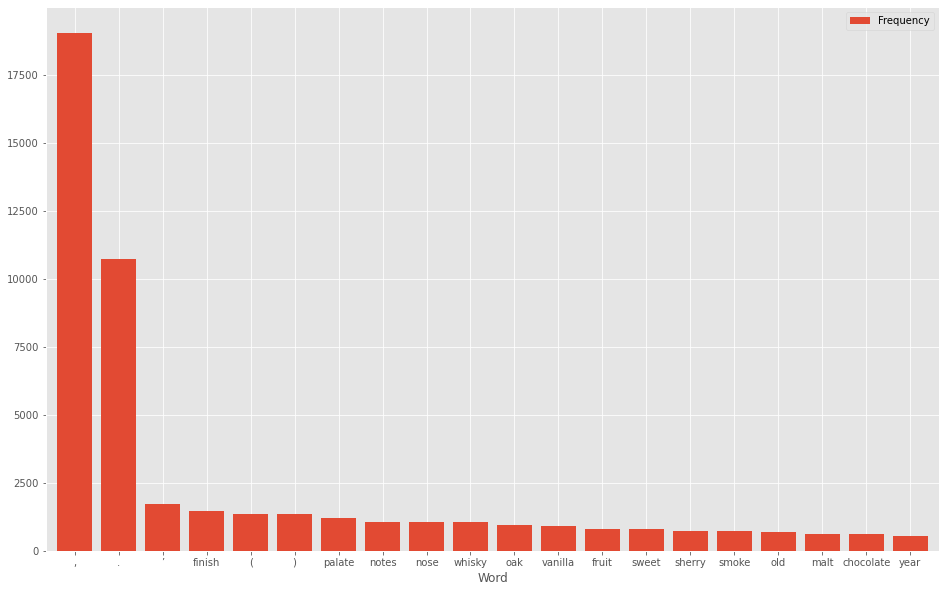

In [12]:
# import matplotlib
# import matplotlib.pyplot as plt
# import pandas as pd
# import nltk
# #nltk.download('punkt')
# top_N = 20
# df = pd.read_csv(r'C:\Users\tusha\dataV2-labs\module-2\Project Whisky review\data\scotch_review.csv',usecols=['description'])
# #df = pd.read_csv(r'/path/to/imdb-5000-movie-dataset.zip',
#  #                usecols=['movie_title','plot_keywords'])

# txt = df.description.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
# words = nltk.tokenize.word_tokenize(txt)
# word_dist = nltk.FreqDist(words)

# stopwords = nltk.corpus.stopwords.words('english')
# words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

# print('All frequencies, including STOPWORDS:')
# print('=' * 60)
# rslt = pd.DataFrame(word_dist.most_common(top_N),
#                     columns=['Word', 'Frequency'])
# print(rslt)
# print('=' * 60)

# rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
#                     columns=['Word', 'Frequency']).set_index('Word')

# matplotlib.style.use('ggplot')

# rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

          Frequency
Word               
’              1043
notes           732
whisky          685
finish.         659
sweet           630
palate          578
sherry          550
nose            536
finish          535
old             529
oak             523
year            504
fruit           476
vanilla,        452
.               434
,               430
palate,         429
hint            395
vanilla         364
cask            342


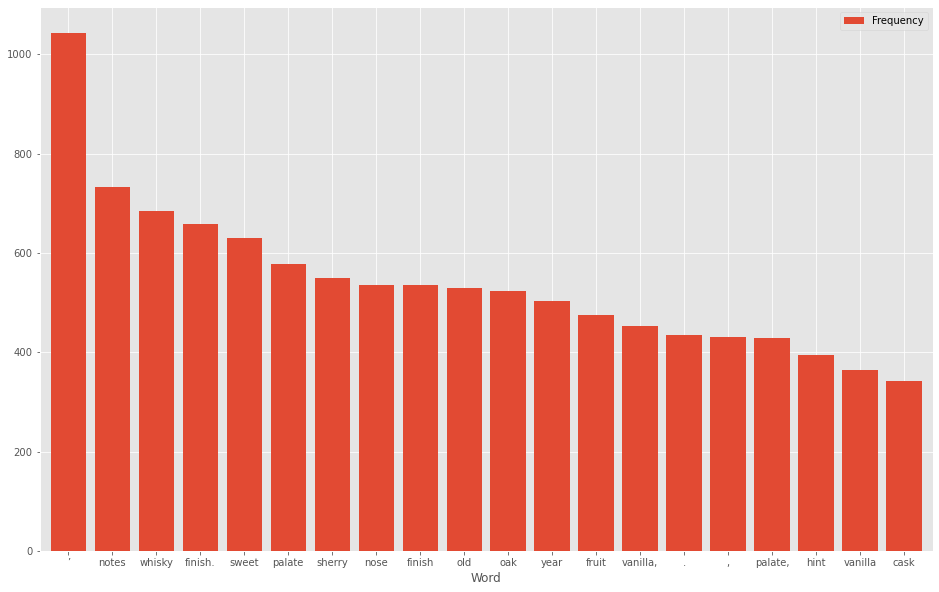

In [19]:
from collections import Counter
import pandas as pd
import nltk

top_N = 20

df = pd.read_csv(r'C:\Users\tusha\dataV2-labs\module-2\Project Whisky review\data\scotch_review.csv',usecols=['description'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.description.str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split())

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

In [25]:
# from wordcloud import WordCloud, STOPWORDS

# def create_word_cloud(df, bg_color, max_words, mask, stop_words, max_font_size, colormap):
    
#     wc = WordCloud(background_color = bg_color, max_words = max_words, mask = mask, stopwords = stop_words, max_font_size = max_font_size)
#     wc.generate(' '.join(df))
    
#     return wc.recolor(colormap = colormap, random_state = 42)

In [31]:
df.plot.line(x= 'age', y='price')

KeyError: 'age'

In [38]:
data_length = pd.DataFrame(df.groupby('category')['description'].count().sort_values(ascending=False))
data_length.reset_index(inplace = True)
data_length.head()

KeyError: 'category'

In [1]:
import sys
#!{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

def create_word_cloud(df, bg_color, max_words, mask, stop_words, max_font_size, colormap):
    
    wc = WordCloud(background_color = bg_color, max_words = max_words, mask = mask, stopwords = stop_words, max_font_size = max_font_size)
    wc.generate(' '.join(df))
    
    return wc.recolor(colormap = colormap, random_state = 42)

In [6]:
sm_df = df[df['category'] == 'Single Malt Scotch']['description'].values
bd_df = df[df['category'] == 'Blended Scotch Whisky']['description'].values

In [7]:
sm_df

array(["What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!",
       "There have been some legendary Bowmores from the mid-60s and this is every bit their equal. All of them share a remarkable aroma of tropical fruit, which here moves into hallucinatory intensity: guava, mango, peach, pineapple, grapefruit. There’s a very light touch of peat smoke, more a memory of Islay than the reality. Concentrated; even at low strength the palate is silky, heady, and haunting, and lasts forever in the dry glass. A legend is born. (Eight bottles only for the U.S.)